# Titanic

In [41]:
import pandas as pd

In [42]:
train_df = pd.read_csv('data/titanic-train.csv')
test_df = pd.read_csv('data/titanic-test.csv')

## Data exploration

- What features correlate with target variable
- What features contain missing values
- Feature value distributions

In [43]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]/home/mahhe/code/misc/kaggle/titanic-machine-learning-from-disaster/venv/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
/home/mahhe/code/misc/kaggle/titanic-machine-learning-from-disaster/venv/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
/home/mahhe/code/misc/kaggle/titanic-machine-learning-from-disaster/venv/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versio

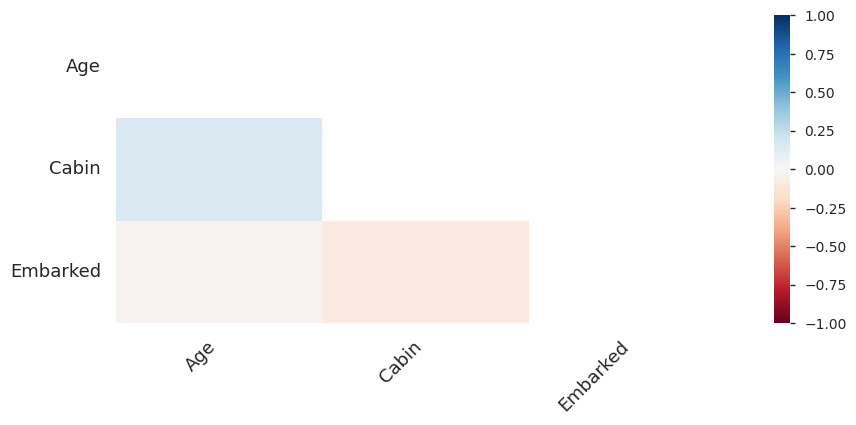

In [44]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train_df)
profile_html = profile.to_html()
#from IPython.core.display import display, HTML
#display(HTML(profile_html))

## Feature engineering

In [45]:
all_datasets = [train_df, test_df]

In [46]:
for dataset in all_datasets:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [47]:
for dataset in all_datasets:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].fillna('Rare')
        
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

Imputation

In [48]:
for dataset in all_datasets:
    dataset['Age'] = dataset['Age'].fillna(int(dataset['Age'].median()))

In [49]:
test_df.Fare = test_df.Fare.fillna(test_df['Fare'].dropna().median())

In [50]:
most_common_embarked = train_df.Embarked.mode()[0]

for dataset in all_datasets:
    dataset.Embarked = dataset.Embarked.fillna(most_common_embarked)

One-hot encoding

In [51]:
for col in ['Sex', 'Embarked', 'Title']:
    train_df = pd.concat([train_df, pd.get_dummies(train_df[col], prefix=col)], axis=1)
    test_df = pd.concat([test_df, pd.get_dummies(test_df[col], prefix=col)], axis=1)

Drop

In [52]:
train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch', 'PassengerId', 'Sex', 'Embarked', 'Title'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Title'], axis=1)

In [53]:
train_df

,Survived,Pclass,Age,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,7.2500,2,False,True,False,False,True,False,False,True,False,False
1,1,1,38.0,71.2833,2,True,False,True,False,False,False,False,False,True,False
2,1,3,26.0,7.9250,1,True,False,False,False,True,False,True,False,False,False
3,1,1,35.0,53.1000,2,True,False,False,False,True,False,False,False,True,False
4,0,3,35.0,8.0500,1,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,False,True,False,False,True,False,False,False,False,True
887,1,1,19.0,30.0000,1,True,False,False,False,True,False,True,False,False,False
888,0,3,28.0,23.4500,4,True,False,False,False,True,False,True,False,False,False
889,1,1,26.0,30.0000,1,False,True,True,False,False,False,False,True,False,False


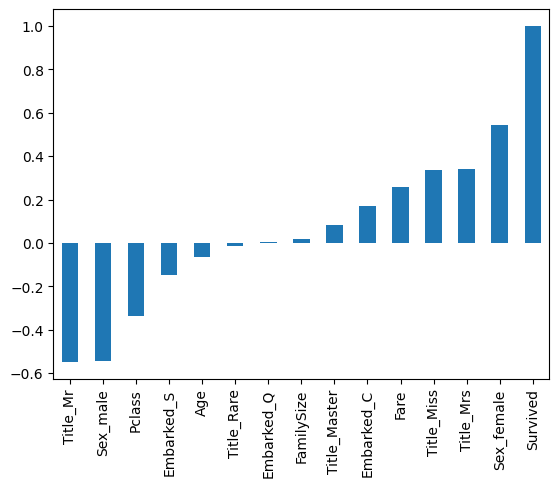

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_df.corr()['Survived'].sort_values().plot(kind="bar")


In [55]:
from sklearn.model_selection import train_test_split
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state=76)

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
accuracy = rf_model.score(X_val, y_val)
print("Accuracy:", accuracy)


Accuracy: 0.8251121076233184


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

# rf_model = grid_search.best_estimator_
# rf_model.fit(X_train, y_train)
# accuracy = rf_model.score(X_val, y_val)
# print("Accuracy:", accuracy)

/home/mahhe/code/misc/kaggle/titanic-machine-learning-from-disaster/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mahhe/code/misc/kaggle/titanic-machine-learning-from-disaster/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mahhe/code/misc/kaggle/titanic-machine-learning-from-disaster/venv/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File 

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.8338773460548616
RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=500)


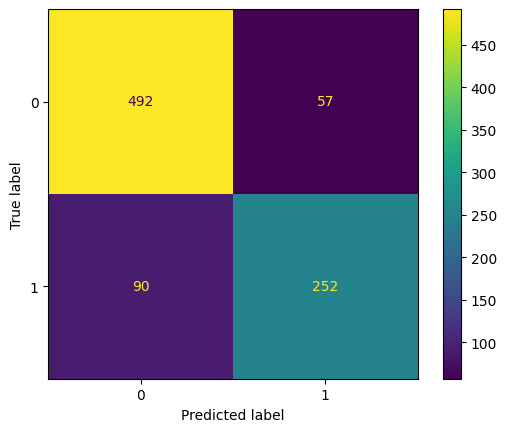

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = grid_search.predict(X)
cm = confusion_matrix(y, predictions, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

In [59]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [63]:
predictions = grid_search.predict(test_df.drop('PassengerId', axis=1))
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)

## Logistic regression

In [30]:
X.skew().sort_values(ascending=False)

Title_Rare      5.990527
Fare            4.787317
Title_Master    4.403096
Embarked_Q      2.948778
FamilySize      2.727441
Title_Mrs       2.061660
Embarked_C      1.595149
Title_Miss      1.444048
Sex_female      0.618921
Age             0.510245
Title_Mr       -0.325752
Sex_male       -0.618921
Pclass         -0.630548
Embarked_S     -1.009665
dtype: float64

In [35]:
# apply log transformation on Fare
import numpy as np
X['Fare'] = X['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
test_df['Fare'] = test_df['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

In [33]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
accuracy = logreg_model.score(X_val, y_val)
print("Accuracy:", accuracy)
print(logreg_model.get_params())

Accuracy: 0.8654708520179372
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/home/mahhe/code/misc/kaggle/titanic-machine-learning-from-disaster/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [1000],
}

logreg_model = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'max_iter': 1000}
0.8260435628648548
